# Statistic Task

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
student_mat_df = pd.read_csv('student-mat.csv', sep=';')
student_por_df = pd.read_csv('student-por.csv', sep=';', quoting=3)

# fetch dataset 
#student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
#X = student_performance.data.features 
#y = student_performance.data.targets 


In [156]:
student_mat_df 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [157]:
student_por_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,"""MS""","""F""",19,"""R""","""GT3""","""T""",2,3,"""services""","""other""",...,5,4,2,1,2,5,4,"""10""","""11""",10
645,"""MS""","""F""",18,"""U""","""LE3""","""T""",3,1,"""teacher""","""services""",...,4,3,4,1,1,1,4,"""15""","""15""",16
646,"""MS""","""F""",18,"""U""","""GT3""","""T""",1,1,"""other""","""other""",...,1,1,1,1,1,5,6,"""11""","""12""",9
647,"""MS""","""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""",...,2,4,5,3,4,2,6,"""10""","""10""",10


# Clean our data

In [158]:
for col in student_por_df.columns:
    if student_por_df[col].dtype == 'object':
       student_por_df[col] = student_por_df[col].str.replace('"', '', regex = False)

student_por_df['G1'] = pd.to_numeric(student_por_df['G1'], errors = 'coerce')
student_por_df['G2'] = pd.to_numeric(student_por_df['G2'], errors = 'coerce')
student_por_df['G3'] = pd.to_numeric(student_por_df['G3'], errors = 'coerce')

In [159]:
student_por_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [160]:
student_mat_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [161]:
print('Math DF has: ', student_mat_df.shape[0], ' rows and ', student_mat_df.shape[1], ' columns')
print('Por DF has: ', student_por_df.shape[0], ' rows and ', student_por_df.shape[1], ' columns')

Math DF has:  395  rows and  33  columns
Por DF has:  649  rows and  33  columns


In [162]:
categorical = student_por_df.select_dtypes(include=['object']).columns
numeric = student_por_df.select_dtypes(include=['int64', 'float64']).columns

print('Categorical entries: ', categorical)
print('Numeric entries', numeric)

Categorical entries:  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Numeric entries Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


### Both datasets contain 33 columns and 395/649 rows in the files.
### They include demographic info, education support, habits, and three grades (G1, G2, G3).

### Categorical features include strings such as school, sex, address, family support, etc.
### Numeric features include study time, absences, failures, alcohol use, and grades.

### This separation is important because numerical features support mathematical analysis

In [163]:
student_mat_df[numeric]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


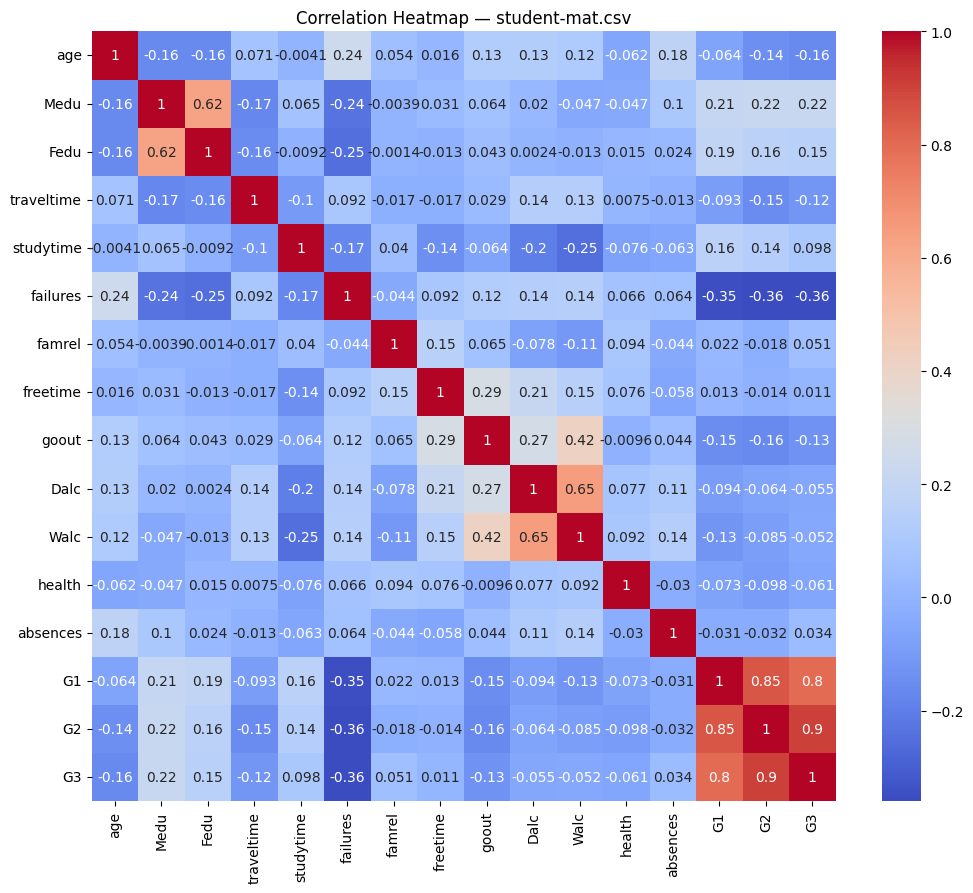

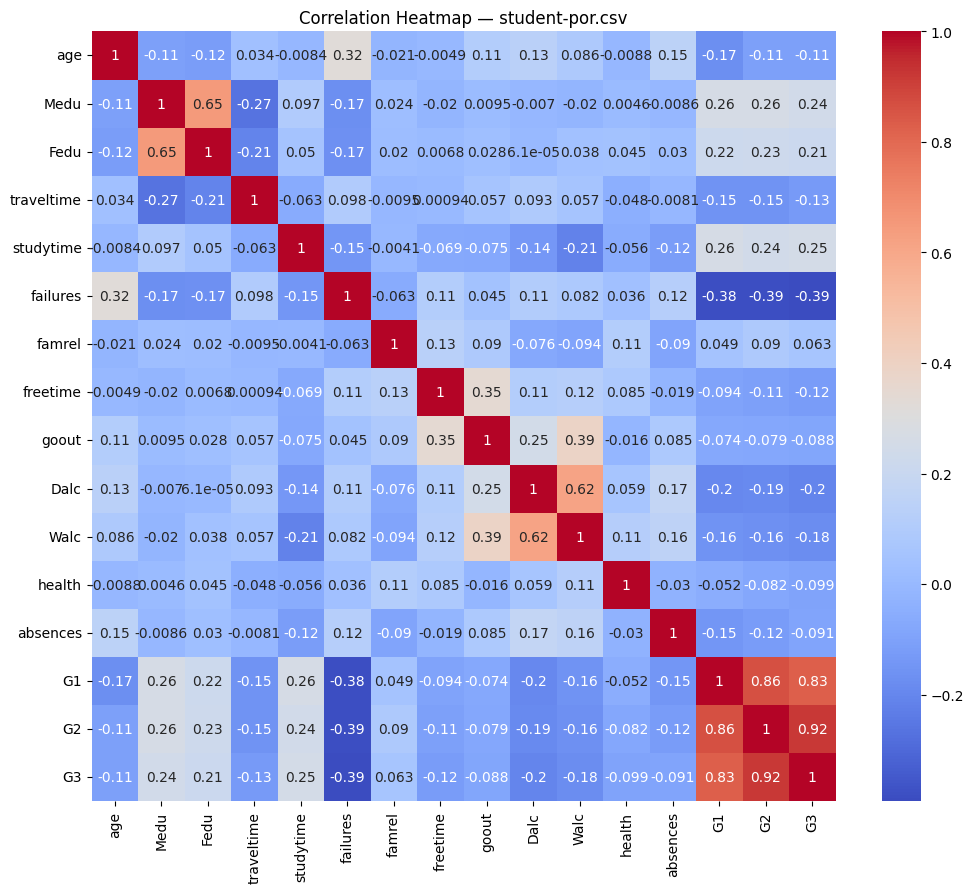

In [164]:
plt.figure(figsize=(12, 10))
sns.heatmap(student_mat_df[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — student-mat.csv")
plt.savefig('MaxShuford_HM_student-mat.png')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(student_por_df[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — student-por.csv")
plt.savefig('MaxShuford_HM_student-por.png')
plt.show()

### These heatmaps show the correlations between all our attributes for both datasets

In [165]:
# function to remove G's and return the other impacts
def top_correlations_excluding_grades(df, target):
    # List of grade columns to exclude
    grade_cols = ['G1', 'G2', 'G3']
    
    corr = df.corr()[target].drop(labels=grade_cols, errors='ignore')

    corr = corr.drop(labels=[target], errors='ignore')

    # Return top 3 absolute correlations
    return corr.abs().sort_values(ascending=False).head(3)

In [166]:
print("Top predictors for G1:\n", top_correlations_excluding_grades(student_mat_df[numeric], 'G1'))

print("Top predictors for G2:\n", top_correlations_excluding_grades(student_mat_df[numeric], 'G2'))

print("Top predictors for G3:\n", top_correlations_excluding_grades(student_mat_df[numeric], 'G3'))

Top predictors for G1:
 failures    0.354718
Medu        0.205341
Fedu        0.190270
Name: G1, dtype: float64
Top predictors for G2:
 failures    0.355896
Medu        0.215527
Fedu        0.164893
Name: G2, dtype: float64
Top predictors for G3:
 failures    0.360415
Medu        0.217147
age         0.161579
Name: G3, dtype: float64


### This shows that G1 G2 G3 (excluding the correlation between themselves) are most impacted by father and mothers education, an class failures, where G3 has age as a bigger correlation

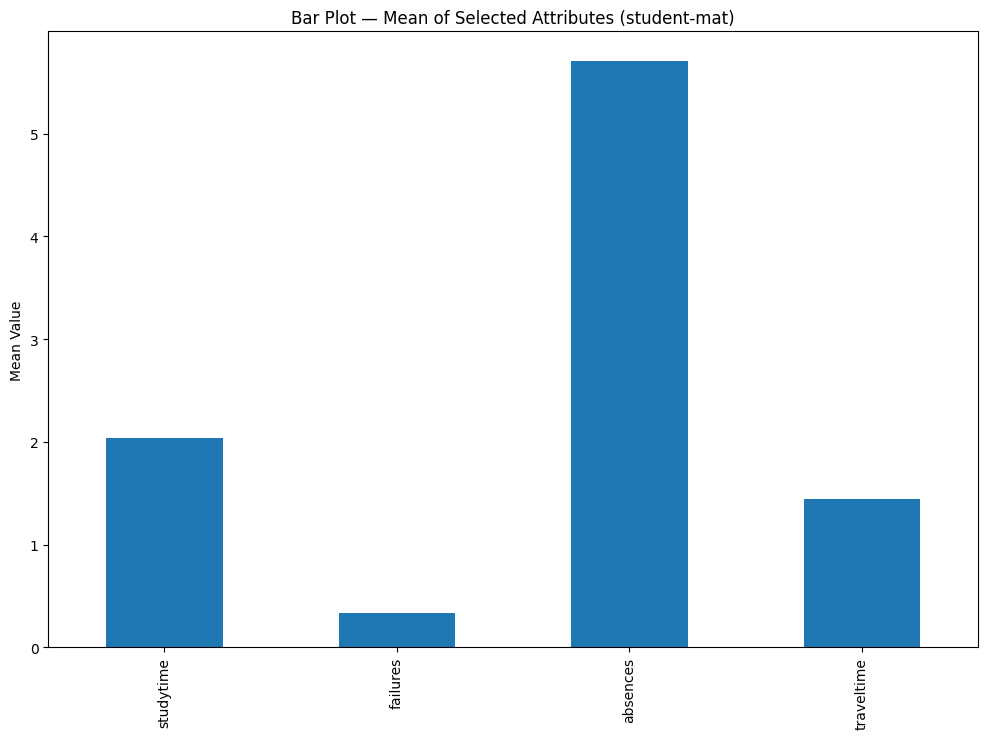

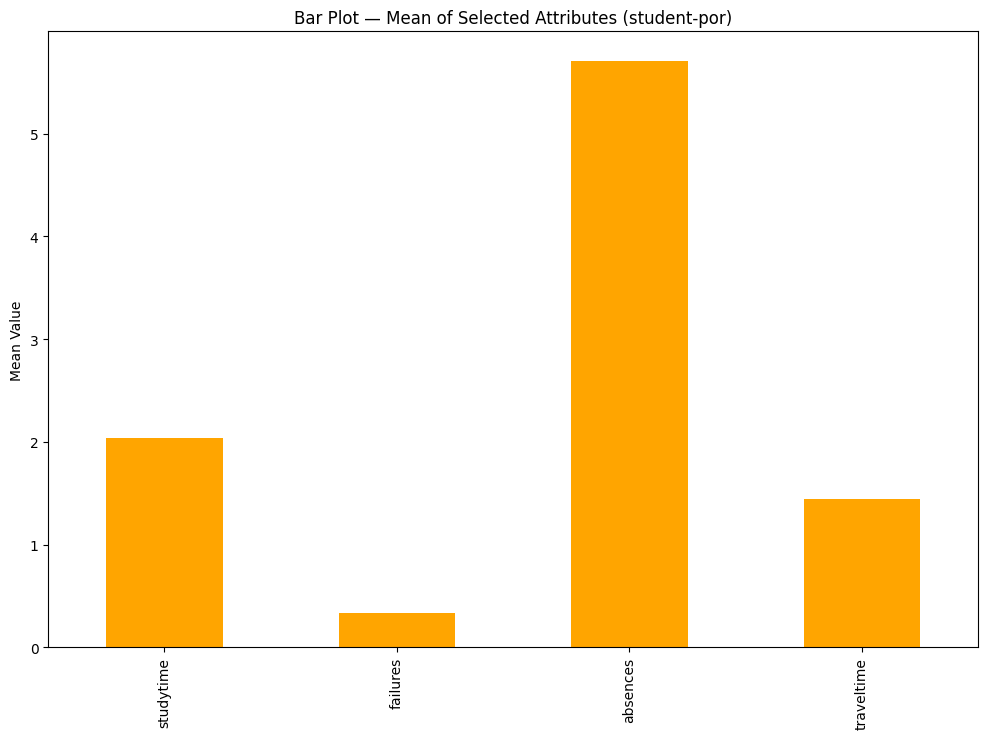

In [167]:
attributes = ["studytime", "failures", "absences", "traveltime"]

plt.figure(figsize=(12, 8))
student_mat_df[attributes].mean().plot(kind="bar")
plt.title("Bar Plot — Mean of Selected Attributes (student-mat)")
plt.ylabel("Mean Value")
plt.savefig('MaxShuford_Bar_student-mat.png')
plt.show()

plt.figure(figsize=(12, 8))
student_mat_df[attributes].mean().plot(kind="bar", color='orange')
plt.title("Bar Plot — Mean of Selected Attributes (student-por)")
plt.ylabel("Mean Value")
plt.savefig('MaxShuford_Bar_student-por.png')
plt.show()

### The bar charts show that most students have:

>Low numbers of failures

>Few absences

>Short to moderate study time

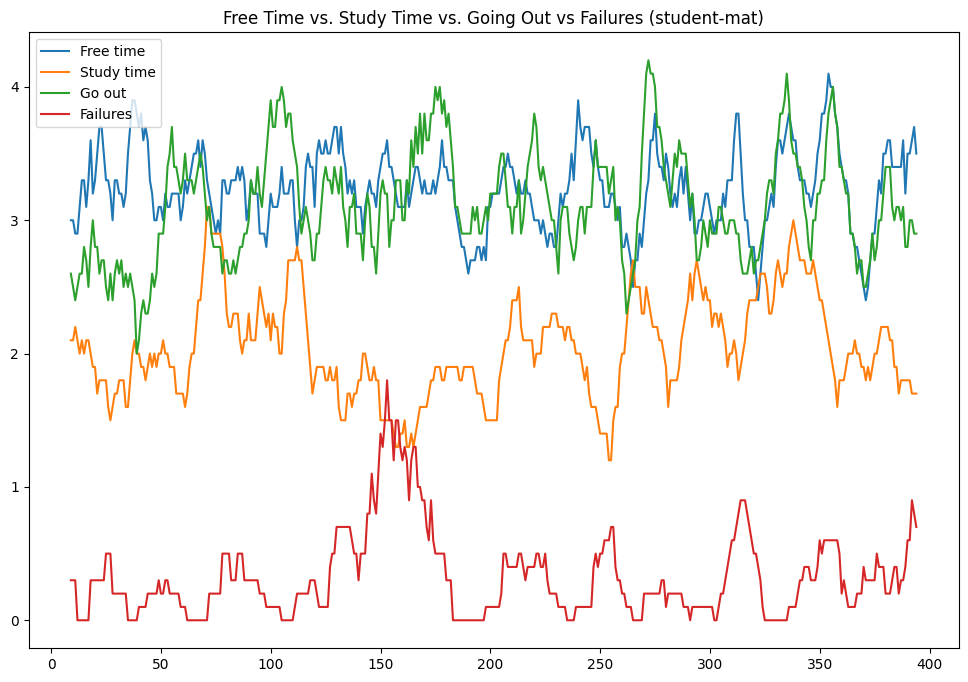

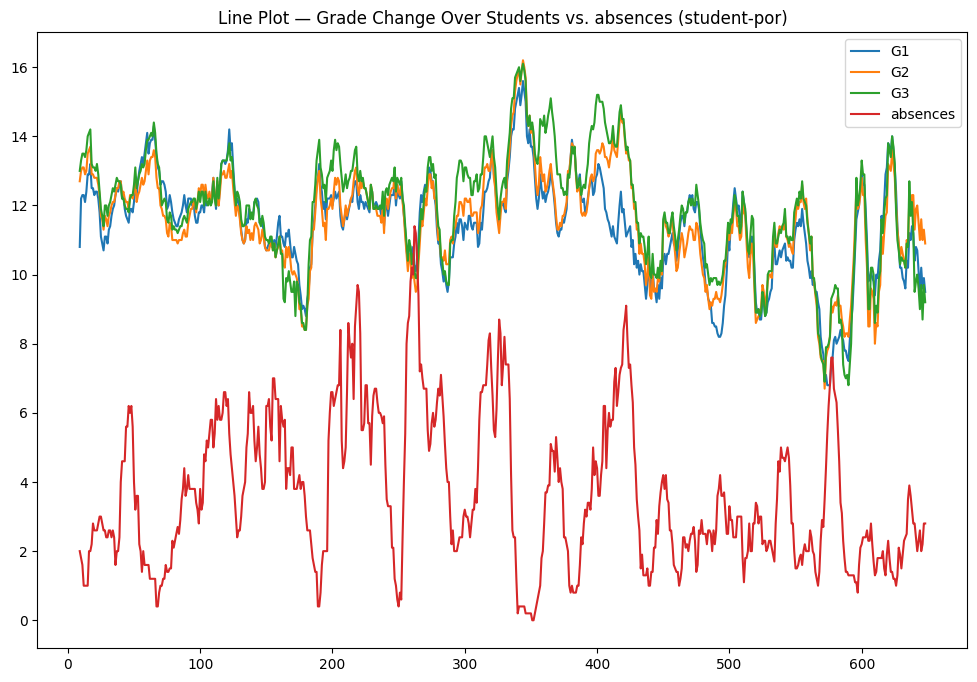

In [168]:
# shorten these names for ease of use
mat = student_mat_df
por= student_por_df

plt.figure(figsize=(12, 8))
plt.plot(mat["freetime"].rolling(10).mean(), label="Free time")
plt.plot(mat["studytime"].rolling(10).mean(), label="Study time")
plt.plot(mat["goout"].rolling(10).mean(), label="Go out")
plt.plot(mat["failures"].rolling(10).mean(), label='Failures')
plt.legend()
plt.title("Free Time vs. Study Time vs. Going Out vs Failures (student-mat)")
plt.savefig('MaxShuford_Scatter_student-mat.png')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(por["G1"].rolling(10).mean(), label="G1")
plt.plot(por["G2"].rolling(10).mean(), label="G2")
plt.plot(por["G3"].rolling(10).mean(), label="G3")
plt.plot(por["absences"].rolling(10).mean(), label="absences")
plt.legend()
plt.title("Line Plot — Grade Change Over Students vs. absences (student-por)")
plt.savefig('MaxShuford_Scatter_student-por.png')
plt.show()

### The key takeaway is that students show much wider variation between free time and going out compared to study time and failure

### Our second graph shows how grades are impacted by absences, which shows that even while abcenses vary wildly, academic performances remain stable.

### i used .rolling(10).mean() to make the graphs easier to visualize

# Data Mining Tasks:

## We will create a tree to show the likelyhood of passing based on studytime, failures and absences on G1 (G1 >= 12).

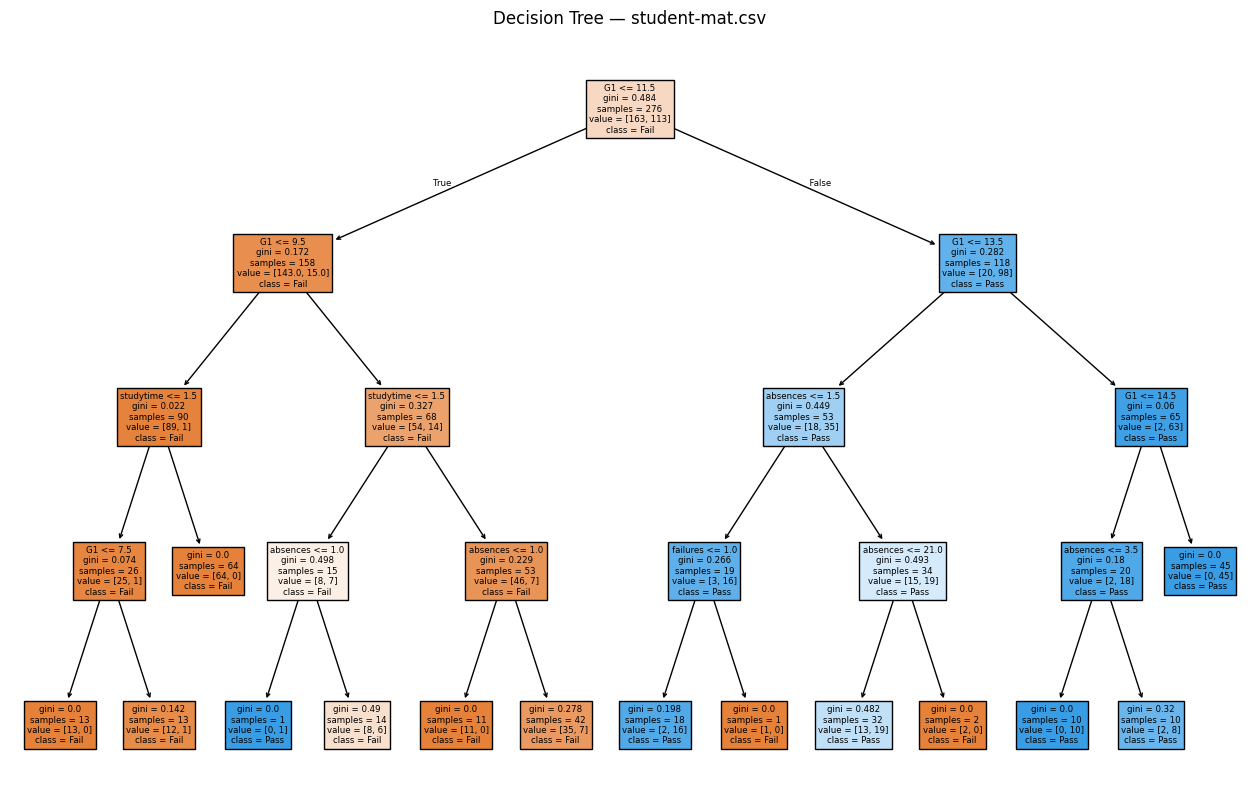

In [147]:
mat['passed'] = (mat['G3'] >= 12).astype(int)

features = ["studytime", "failures", "absences", "G1"]
X = mat[features]
y = mat['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=features, class_names=["Fail", "Pass"], filled=True)
plt.title("Decision Tree — student-mat.csv")
plt.savefig('MaxShuford_Decision Tree — student-mat.png')
plt.show()

### We perform our first split based on whether the grade is >= 12 or not, (meaning they are more likely to pass)
> > If G1 is 11 or lower, the model leans toward Fail
> > If G1 is 12 or higher, the model immediately leans toward Pass
> Higher failures strongly decrease passing probability.

> Studytime and absences have weaker secondary effects.

## Naive Bayes for the portuguese-studying students

In [148]:
por['passed'] = (por['G3'] >= 12).astype(int)

dist = por['passed'].value_counts(normalize=True) * 100
dist

passed
1    53.620955
0    46.379045
Name: proportion, dtype: float64

### Pass/Fail Distribution for Portuguese-Speaking Students
### To prepare the dataset for binary Naive Bayes classification, a new target variable passed was created based on the final grade G3. Students with G3 ≥ 12 were labeled as 1 (passed), and all others were labeled as 0 (failed).

In [149]:
por['passed'] = (por['G1'] >= 12).astype(int)

dist = por['passed'].value_counts(normalize=True) * 100
dist

passed
0    52.850539
1    47.149461
Name: proportion, dtype: float64

In [150]:
features_nb = ["studytime", "absences", "G1"]

X = por[features_nb]
y = por["passed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

## Check the predictions
y_pred[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

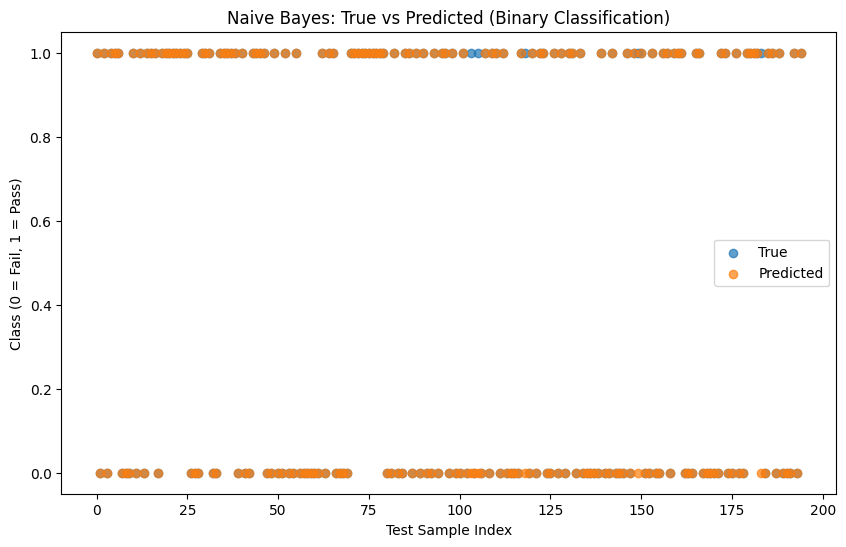

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="True", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7)
plt.title("Naive Bayes: True vs Predicted (Binary Classification)")
plt.xlabel("Test Sample Index")
plt.ylabel("Class (0 = Fail, 1 = Pass)")
plt.legend()
plt.savefig('MaxShuford_NaiveBayesScatter_PassFail.png')
plt.show()

### This scatter graph shows our prediction of passes and fails vs our true labels. 1.0 is a pass 0.0 is a fail

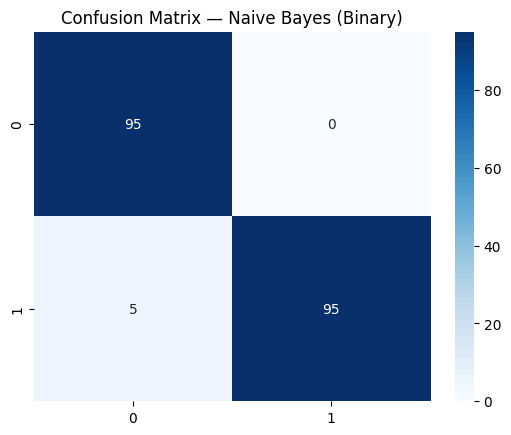

In [153]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix — Naive Bayes (Binary)")
plt.savefig('MaxShuford_CM_NaiveBayes_G1.png')
plt.show()

### Our classifier relies heavily on G1 to make predictions, studytime and absences contribute but dont impact outcome as heavily

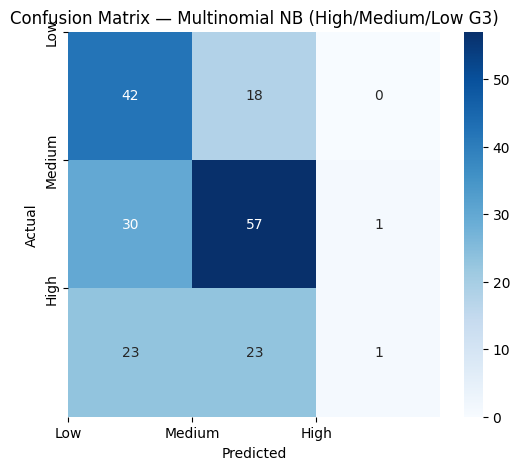

In [154]:
## Select our three grade bins
por['grade_level'] = pd.qcut(por['G3'], q=3, labels=['Low', 'Medium', 'High'])

## create a copy of our df using our selected features
mnb_features = ["studytime", "failures", "schoolsup", "famsup", "activities"]
df_mnb = por[mnb_features].copy()

## encode our labels
for col in df_mnb.select_dtypes(include='object'):
    df_mnb[col] = LabelEncoder().fit_transform(df_mnb[col])

X = df_mnb
y = por['grade_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix — Multinomial NB (High/Medium/Low G3)")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1,2], ["Low", "Medium", "High"])
plt.yticks([0,1,2], ["Low", "Medium", "High"])
plt.savefig('MaxShuford_CM_MultiNB_G3.png')

### Although the classes are evenly distributed, the resulting confusion matrix is not evenly distributed. This is expected and reflects the fact that the chosen features have weak predictive power for distinguishing among Low, Medium, and High performance levels.
> ### Correct predictions appear mainly along the diagonal, but off-diagonal values indicate that the model struggles to differentiate fine-grained grade differences.